Training Set Accuracy: 99.61%
Retina Medium - Training Sensitivity: 98.44%, Training Specificity: 100.00%
Retina Mild - Training Sensitivity: 100.00%, Training Specificity: 100.00%
Retina Normal - Training Sensitivity: 100.00%, Training Specificity: 100.00%
Retina Severe - Training Sensitivity: 100.00%, Training Specificity: 99.48%

Test Set Accuracy: 79.69%
Retina Medium - Sensitivity: 100.00%, Specificity: 95.83%
Retina Mild - Sensitivity: 62.50%, Specificity: 91.67%
Retina Normal - Sensitivity: 81.25%, Specificity: 91.67%
Retina Severe - Sensitivity: 75.00%, Specificity: 93.75%

Classification Report:
               precision    recall  f1-score   support

Retina Medium       0.89      1.00      0.94        16
  Retina Mild       0.71      0.62      0.67        16
Retina Normal       0.76      0.81      0.79        16
Retina Severe       0.80      0.75      0.77        16

     accuracy                           0.80        64
    macro avg       0.79      0.80      0.79        64
 

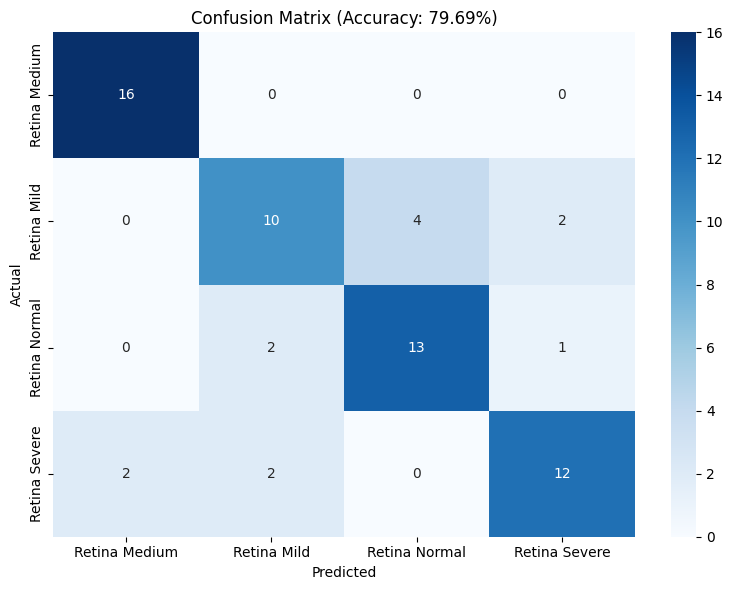

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('Klasifikasi Katarak.csv', header=None, decimal=',')
data.columns = ['Feature1', 'Feature2', 'Feature3', 'Label']

# Prepare features and labels
X = data[['Feature1', 'Feature2', 'Feature3']].values
y = data['Label'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create model with optimized parameters
model = MLPClassifier(
    hidden_layer_sizes=(100, 50),        # Simplified architecture
    activation='tanh',                   # Suitable activation for 'lbfgs'
    solver='lbfgs',                      # Using 'lbfgs' solver
    early_stopping=True,                 # Enable early stopping
    validation_fraction=0.2,             # Fraction for validation
    max_iter=10000,                      # Increased iterations
    random_state=42,                     # For reproducibility
    tol=1e-8,                            # Increased tolerance
    verbose=True                         # Enable verbose to monitor training
)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model.fit(X_train, y_train)

# Calculate and print training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy * 100:.2f}%")

# Calculate sensitivity and specificity for the training set
y_train_pred = model.predict(X_train)
train_recall = recall_score(y_train, y_train_pred, average=None)
train_specificity = []
cm_train = confusion_matrix(y_train, y_train_pred)
for i in range(len(le.classes_)):
    tn = cm_train.sum() - (cm_train[i, :].sum() + cm_train[:, i].sum() - cm_train[i, i])
    fp = cm_train[:, i].sum() - cm_train[i, i]
    train_specificity.append(tn / (tn + fp))
for idx, label in enumerate(le.classes_):
    print(f"{label} - Training Sensitivity: {train_recall[idx] * 100:.2f}%, Training Specificity: {train_specificity[idx] * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")

# Calculate sensitivity and specificity for each class
recall = recall_score(y_test, y_pred, average=None)
specificity = []
cm = confusion_matrix(y_test, y_pred)
for i in range(len(le.classes_)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity.append(tn / (tn + fp))
for idx, label in enumerate(le.classes_):
    print(f"{label} - Sensitivity: {recall[idx] *100:.2f}%, Specificity: {specificity[idx] * 100:.2f}%")
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()